# Name: Satyaraja Dasara
# Email: sdasara95@gmail.com

# <a href='https://www.linkedin.com/in/sdasara95/'><i class="fa fa-linkedin" aria-hidden="true"></i></a> <a href='https://github.com/sdasara95' ><i class="fa fa-github" style="color:black" aria-hidden="true"></i></a> <a href='https://sdasara95.github.io/' ><i class="fa fa-rss" aria-hidden="true" style="color:orange"></i></a>

# Klaviyo Customer Analysis Project

In [112]:
# Importing all the necessary packages
import os
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [113]:
# Listing the files in current folder
os.listdir()

['.ipynb_checkpoints',
 'Prudhvi_Klaviyo.ipynb',
 'Satyaraja_Dasara_Klaviyo.ipynb',
 'screening_exercise_orders_v201810.csv']

In [114]:
# Reading the csv file into a Pandas dataframe
file_name = 'screening_exercise_orders_v201810.csv'
data = pd.read_csv(file_name)

In [115]:
# Peeking into the first 10 records
data.head(10)

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
5,1005,1,2017-01-01 10:08:05,338.00,0
6,1006,1,2017-01-01 15:42:57,1526.43,1
7,1007,0,2017-01-01 15:59:50,168.00,0
8,1008,0,2017-01-01 18:01:04,207.99,0
9,1009,1,2017-01-01 19:27:17,283.00,1


In [116]:
# Checking the data-types of the columns in data
data.dtypes

customer_id           int64
gender                int64
date                 object
value               float64
predicted_gender      int64
dtype: object

In [117]:
# Converting the data-type of the date column to datetime and doing sanity check of the data-types
data['date'] = pd.to_datetime(data['date'])
data.dtypes

customer_id                  int64
gender                       int64
date                datetime64[ns]
value                      float64
predicted_gender             int64
dtype: object

In [118]:
# Checking the shape of the dataframe 
data.shape

(13471, 5)

# Executing the tasks

## A) Assemble a dataframe with one row per customer and the following columns:

* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)

Sort the dataframe by customer_id ascending and display the first 10 rows.

**Since we are required to have one row for each Customer ID, we need to Group By Customer ID.<br>
Each Customer ID can have more than one gender in multiple records, hence, we use Scipy.stats to get the mode for gender for each Customer ID. <br>
We use np.max to get the most recent order date. <br>
We use np.size to get the count of records with a particular Customer ID**

In [234]:
df = data.groupby('customer_id', as_index=False).agg({'gender': lambda x: stats.mode(x)[0][0], 'date': np.max, 'value': np.size})
# Changing the names of the columns
df.columns = ['customer_id','gender','most_recent_order_date','order_count']
# Sorting values for customer_id to print in ascending order. Sorting is not required but a sanity check.
df = df.sort_values(['customer_id'])
df.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1.0
1,1001,0,2017-01-01 00:29:56,1.0
2,1002,1,2017-02-19 21:35:31,3.0
3,1003,1,2017-04-26 02:37:20,4.0
4,1004,0,2017-01-01 03:11:54,1.0
5,1005,1,2017-12-16 01:39:27,2.0
6,1006,1,2017-05-09 15:27:20,3.0
7,1007,0,2017-01-01 15:59:50,1.0
8,1008,0,2017-12-17 05:47:48,3.0
9,1009,1,2017-01-01 19:27:17,1.0


**Customer with Id 6419 seems to be a highest revenue generating customer with 25 orders**

In [123]:
df[df.order_count==np.max(df['order_count'])]

,customer_id,gender,most_recent_order_date,order_count
6419,7419,1,2017-12-15 15:34:56,25.0


## B) Plot the count of orders per week for the store.

**We create a new column called Week by applying strftime method on date column. <br>
This method will assign any days in the beginning of January which are in the same week as last days of December of previous year to Week 0. <br>
We Group By the Week column and use np.size for the value field to get the count of orders. <br>
We get our final data-frame with Week numbers and corresponding count of orders for that week.**

In [126]:
df_b = data.copy()
# New column with week numbers extracted from date column
df_b['week'] = df_b.date.dt.strftime('%W')
df_b = df_b.groupby(df_b['week'],as_index=False).agg({'value': np.size})
df_b.columns = ['week','orders_per_week']
df_b.head(5)

,week,orders_per_week
0,00,14.0
1,01,180.0
2,02,264.0
3,03,405.0
4,04,233.0


**Week 0 is the starting days of January that fall in the 52nd week of previous year**

**Displaying all the week numbers in x-axis will make the x-axis cluttered and untidy. <br>
We use 4 week windows for better legibility. <br>
We ignore Week 0 as it's an incomplete week with days from previous year. <br>
We instead start the x-ticks from week 1.**


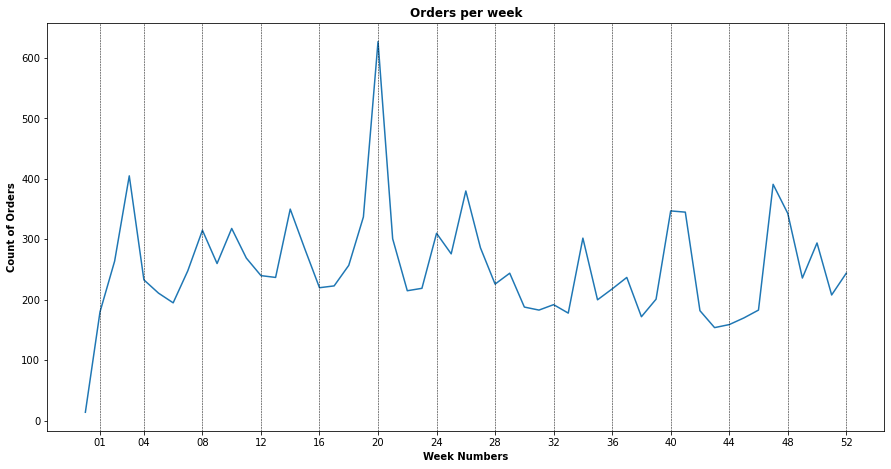

In [162]:
# xcoords stores the x axis values where we want the vertical dash lines
xcoords =[1]+[i for i in range(4,53,4)]
# Set a default figure size
plt.figure(figsize=(15,7.5))
# Plotting lineplot using seaborn package
ax = sns.lineplot(x='week',y='orders_per_week',data= df_b)
# Setting title and labels for the plot
ax.set_title('Orders per week',fontweight='bold')
ax.set_ylabel('Count of Orders',fontweight='bold')
ax.set_xlabel('Week Numbers',fontweight='bold')
# Drawing the ticks on the x
plt.xticks(xcoords)
# Drawing the vertical dash line for each week in 4 week window
for xc in xcoords:
    plt.axvline(x=xc,color='black',linestyle='--',linewidth=0.5)
plt.show(ax)

**Week 20 had the highest count of orders.**

**We can also plot for the four financial quarters to get a better insight. <br>
Let's do it by using different colors for each quarter. Let's use Viridis, a colorblind proof colormap.**

In [197]:
import matplotlib
# Fetching the colormap pallete
cmap = matplotlib.cm.get_cmap('viridis')
# Choosing 4 colors equally spaced between 0.1 and 0.9 using np.linspace
colors = [cmap(i) for i in np.linspace(0.1,0.9,4) ]

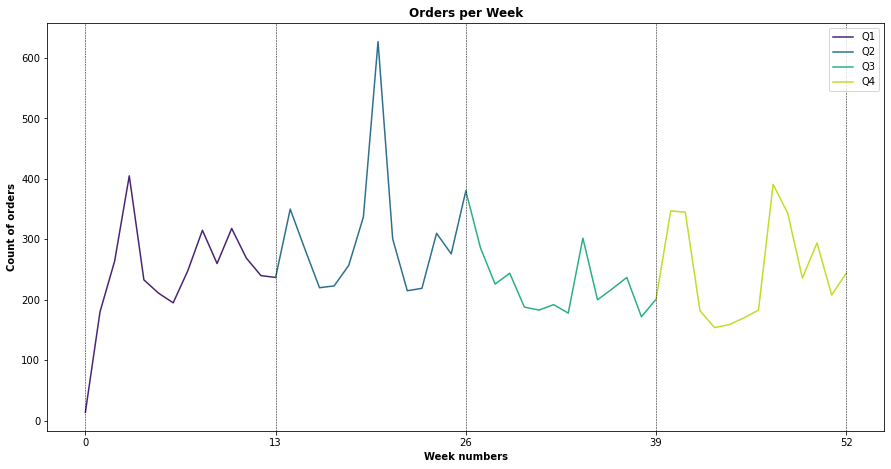

In [198]:
orders = df_b['orders_per_week'].to_numpy()
quart = 52//4
# Getting the ending weeks of the 4 quarters
quarters = [quart*i for i in range(1,5,1)]

plt.figure(figsize=(15,7.5))
# Starting and ending week for each quarter plot. Initially week is 0.
start = 0
end = start+quart
for i in range(4):
    # Since last index is excluded we add 1. This is because we have week 0 too.
    final_end = min(end+1,53)
    # Week numbers for x axis for this quarater
    x_axis = [i for i in range(start,final_end)]
    quarter_number = i+1
    plt.plot(x_axis,orders[start:final_end],label = f'Q{quarter_number}',color=colors[i])
    # Updating new start and end for next quarter
    start+=quart
    end+=quart

plt.xticks([0]+quarters)
# Initially plotting vertical dashed line for week 0.
plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
for i in quarters:
    plt.axvline(x=i,color='black',linestyle='--',linewidth=0.5)

# Plotting legend
plt.legend()

plt.title('Orders per Week',fontweight='bold')
plt.xlabel('Week numbers',fontweight='bold')
plt.ylabel('Count of orders',fontweight='bold')
plt.show()

**Quarter 2 was the highest revenue generating quarter for this store.**

## C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

**Let's convert the columns into numpy arrays and calculate the mean values**

In [200]:
# Converting the column values for each gender to numpy
orders_0 = data[data.gender.eq(0)]['value'].to_numpy()
orders_1= data[data.gender.eq(1)]['value'].to_numpy()
N_0 = len(orders_0)
N_1 = len(orders_1)

In [201]:
# Getting the mean order value directly using numpy
mean_0 = np.mean(orders_0)
mean_1 = np.mean(orders_1)

print('Mean order value for\033[1m gender 0 \033[0mis\033[1m {:0.2f} \033[0m'.format(mean_0))
print('Mean order value for\033[1m gender 1 \033[0mis\033[1m {:0.2f} \033[0m'.format(mean_1))

Mean order value for gender 0 is 363.89 
Mean order value for gender 1 is 350.71 


**We plot the distribution plot for each gender to get an idea of the data distribution**

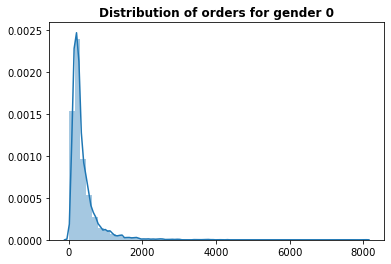

In [218]:
chart = sns.distplot(orders_0)
chart.set_title('Distribution of orders for gender 0',fontweight='bold')
chart.set_xlabel
plt.show(chart)

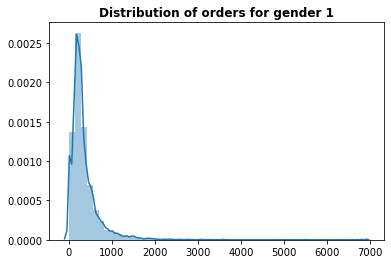

In [217]:
chart = sns.distplot(orders_1)
chart.set_title('Distribution of orders for gender 1',fontweight='bold')
plt.show(chart)

**The distributions seem skewed to the right. <br>
They look like Log Normal distributions.**

**Let's evaluate the skewness using Scipy's stats.skew method. <br>
A normal distribution should a skew of 0.**

In [211]:
# Since there is no statistical estimation being done, we set the bias as False for skew. 
skewness_0 = stats.skew(orders_0, axis=0, bias=False)
print('Skewness for gender 0 is {:0.2f}'.format(skewness_0))

Skewness for gender 0 is 4.41


In [212]:
skewness_1 = stats.skew(orders_1, axis=0, bias=False)
print('Skewness for gender 1 is {:0.2f}'.format(skewness_1))

Skewness for gender 1 is 4.91


**The distributions are highly skewed with high values 4.4 and 4.9 <br>
Let's try handling this by applying a Log Transform and checking if distribution becomes normal by plotting distplot again. <br>Since we can't ignore zero order values we add a small noise of 10e-5 before doing Log**

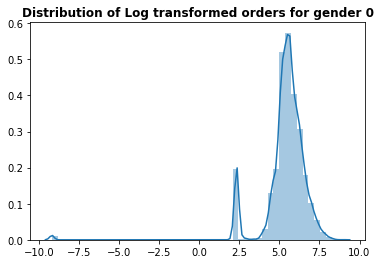

In [215]:
# We apply log for each element in our orders array.
# We add a small noise of 10e-5 as we can't zero order values.
new0 = np.array([np.log(i+10e-5) for i in orders_0])
# Plotting distplot using seaborn and returning the axes 
a = sns.distplot(new0)
# Setting the title of the axes
a.set_title('Distribution of Log transformed orders for gender 0',fontweight='bold')
plt.show(a)

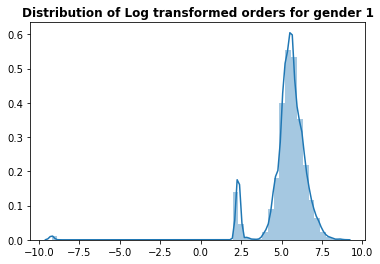

In [216]:
new1 = np.array([np.log(i+10e-5) for i in orders_1])
a = sns.distplot(new1)
a.set_title('Distribution of Log transformed orders for gender 1',fontweight='bold')
plt.show(a)

**The two log transformed distributions are looking Bi-Modal and not Normal.**

**The distributions don't look completely normal.<br>
Let's plot a QQ-Plot using statsmodels package and verify the normality.**

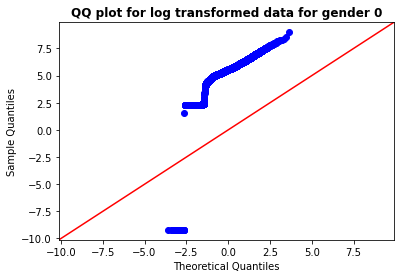

In [220]:
# Using the statsmodels package to plot qq plot with a 45 degree line to check for normality
sm.qqplot(new0, line ='45') 
plt.title('QQ plot for log transformed data for gender 0',fontweight='bold')
plt.show()

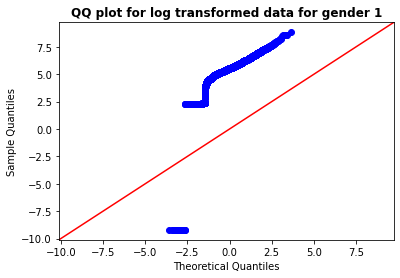

In [221]:
sm.qqplot(new1, line ='45') 
plt.title('QQ plot for log transformed data for gender 1',fontweight='bold')
plt.show()

**The quantiles are not overlapping with the 45 degrees line. <br>
It looks like the distributions aren't normal at all. <br>
Let's check for the number of samples for each gender**

In [95]:
print(f'Number of samples with gender 0 is {N_0}')
print(f'Number of samples with gender 1 is {N_1}')

Number of samples with gender 0 is 6759
Number of samples with gender 1 is 6712


**The number of samples are pretty high and are roughly equal.**

**Let's check if both the groups can be assumed to have equal variance.**

**Assume null hypothesis that both the groups have equal variance and conduct Levene test with alpha = 0.05**

In [223]:
# Using scipy.stats to conduct Levene test. The test is 2 sided p test. The alpha and p value are both sided cumulative.
l_stat,levene_pvalue = stats.levene(orders_0,orders_1)
print(f'The p-value for Levene test is {levene_pvalue}')

The p-value for Levene test is 0.018782230716425024


**Since p-value is lesser than alpha we reject the null hypothesis that the two groups have equal variances**

**Let's do our significance testing on the original data itself. <br>
Since we have a large number of samples, let's first do a Welch independent t-test for unequal variances. <br>
Usually this test is robust to assumption of normality when number of samples are high for both groups. <br>**

**Our Null Hypothesis is that the means of order values for both the groups are equal with alpha = 0.05**

In [78]:
t_stat, p_val = stats.ttest_ind(a=orders_0, b=orders_1, equal_var=False, nan_policy='omit')

In [79]:
print(f'Welch t-test P-value is {p_val}')

Welch t-test P-value is 0.04816296295128402


**The obtained p-value is very close to our alpha and normally we would reject the Null hypothesis.<br>
The difference in means seems to be statistically different.**

**We conduct the Mann Whitney U-test to be double sure whether the two groups belong to the same distribution.**

**Our Null Hypothesis is that the two groups belong to the same distribution with alpha=0.05.**

In [80]:
u_stat, p_val = stats.mannwhitneyu(orders_0, orders_1)

In [81]:
print(f'Mann Whitney U-test P-value is {p_val}')

Mann Whitney U-test P-value is 0.15220525508505944


**Since p-value obtained is much greater than our alpha we have to accept Null Hypothesis that both groups have the same distribution as per Mann Whitney U-test.**

**This leaves us in a bit of a fix. <br>
Our distributions are highly skewed to the right meaning that there could be potential outliers. <br>
Outliers reduce the chance of rejecting the null hypothesis for Welch yet we got p-value lesser than alpha for Welch. <br>
Hence, we conclude that DIFFERENCE IS SIGNIFICANT between the genders.**

## D) Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

**Confusion matrix is used to evaluate the quality of predictions for a classification problem.**

**Each customer id can have more than one gender and predicted gender for multiple records. <br>
We take the mode for gender and predicted gender for each customer id to tackle this. <br>
We group by Customer ID and take the mode using Scipy's stats.mode**

In [225]:
df = data.groupby('customer_id', as_index=False).agg({'gender': lambda x: stats.mode(x)[0][0], 'predicted_gender': lambda x: stats.mode(x)[0][0]})

**We generate and plot the Confusion Matrix using sklearn and seaborn**

In [226]:
#Using sklearn.metrics' confusion_matrix methos to generate our confusion matrix. 
from sklearn.metrics import confusion_matrix
y = df['gender'].to_numpy()
y_pred = df['predicted_gender'].to_numpy()
cf_matrix = confusion_matrix(y, y_pred)

In [228]:
# Sklearn confusion matrix sorts rows according to labels in ascending manner.
cf_matrix

array([[2189, 2218],
       [ 895, 3512]], dtype=int64)

In [229]:
#Fetch the True Negative, False Positive, False Negative and True Positive values
#Ravel is used to flatten the matrix into a 1-D vector/list
tn, fp, fn, tp = cf_matrix.ravel()

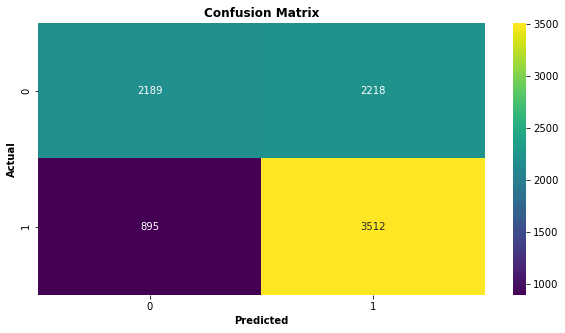

In [232]:
plt.figure(figsize=(10,5))
g = sns.heatmap(cf_matrix, annot=True,fmt='d',cmap='viridis')
g.set_title('Confusion Matrix',fontweight='bold')
g.set_xlabel('Predicted',fontweight='bold')
g.set_ylabel('Actual',fontweight='bold')
plt.show()

**It looks like the model is predicting well for gender 1 but poorly for gender 0**

**Let's check for class imbalance in the data**

In [109]:
print('Number of gender 0 is {}'.format(len(y[y==0])))
print('Number of gender 1 is {}'.format(len(y[y==1])))

Number of gender 0 is 4407
Number of gender 1 is 4407


**Data has no class imbalance. <br>
Assuming that prediction of both genders have equal priority,
let's check accuracy, specificity and recall.**

In [233]:
acc = (tp+tn)/(tp+tn+fp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print('Accuracy is {:0.2f}'.format(acc))
print('Sensitivity is {:0.2f}'.format(sensitivity))
print('Specificity is {:0.2f}'.format(specificity))

Accuracy is 0.65
Sensitivity is 0.80
Specificity is 0.50


**Assuming that the correct prediction for both genders is equally important: <br>
Positive label in our case is gender 1. Negative label is gender 0.<br>
Sensitivity is 80% i.e. gender 1.<br>
Specificity is 50% i.e. gender 0.<br>
Overall accuracy is just 65%. <br>
This means the model is predicting relatively better for gender 1 than gender 0. <br>
Overall, the QUALITY OF PREDICTIONS IS POOR. <br>
It could be that the original training dataset has a class imbalance with more number of gender 1 records. <br>
To improve this model we need to optimize first for specificity then accuracy. <br>
Currently the prediction for gender 0 is equivalent to that of a coin-flip. <br>**

### E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.

One of my favorite techniques is regularization to reduce over-fitting and generalise the model better.
I built an eye tracking software during my internship at [edgetensor](https://edgetensor.com/)
where I detected and converted eye region images into flattened vectors and prediction the x and y location points on the screen
the user is looking at. During the calibration phase, I asked the user to look at few calibration points on the screen and collected
the images and flattened them as a vector of length 60 where each element is a variable in the regression equation for least squares.
I noticed that the training data is low i.e. less than 100 data points due to which the model likely overfitted on training and 
performed poorly on test data. I applied regularization using ridge regression and lasso regression and finally settled on ridge
regression as it gave less error and worked better on my small training set.

## Key Takeaways
* Customer ID 6419 has the highest orders with 25, 9 greater than second highest ordering customer with 16.
* Quarter 2 is highest revenue generating quarter for the shop.
* Jan 1 fell into week 0 with last days of previous year.
* Order value distributions for both the genders seems similar but the difference in means is statistically significant.
* Model performs poorly for gender 0.

## Future Work
* Decision trees can be tried to build a classification model for the gender.
* Data for more years can to evaluated to check for trend of high revenue for Q2.
* More research has to be done for significance testing for non-normal distributions (bi/multi-modal or log normal)
* Need more data to get a better insight.